# Haar System

In [75]:
import numpy as np

def approximation(array):
    return array[:array.shape[0]//2]

def details(array):
    return array[array.shape[0]//2:]

def i_num(array):
    return int(np.ceil(np.log2(len(array))))

root2 = np.sqrt(2)
s = np.array([32, 32, 16, 8, 24, 16, 64, 32])

In [76]:
def direct_wavelet(array,output):
    N, N2, = array.shape[0], array.shape[0] // 2
    for i in range(0,N,2):
        output[int(i/2)] = (array[i] + array[i+1])/root2
        output[int(i/2 + N2)] = (array[i] - array[i+1])/root2
    return output

def inverse_wavelet(output,signal):
    N, N2,  = output.shape[0], output.shape[0] // 2
    for i in range(0,N,2):
        signal[i] = (output[int(i/2)] + output[int(i/2 + N2)])/root2
        signal[i+1] = (output[int(i/2)] - output[int(i/2 + N2)])/root2
    return signal


In [77]:
# DIRECT WEVELET TRANSFORM --> dwt
dwt = np.empty(len(s))
dwt = direct_wavelet(s,dwt)
print("\nApproximation coefficients (A1):", approximation(dwt))
print("Detail coefficients (D1):", details(dwt))

dwt2 = np.empty(len(approximation(dwt)))
dwt2 = direct_wavelet(approximation(dwt),dwt2)
print("\nApproximation coefficients (A2):", approximation(dwt2))
print("Detail coefficients (D2):", details(dwt2))


dwt3 = np.empty(len(approximation(dwt2)))
dwt3 = direct_wavelet(approximation(dwt2),dwt3)
print("\nApproximation coefficients (A3):", approximation(dwt3))
print("Detail coefficients (D3):", details(dwt3))


Approximation coefficients (A1): [45.254834   16.97056275 28.28427125 67.88225099]
Detail coefficients (D1): [ 0.          5.65685425  5.65685425 22.627417  ]

Approximation coefficients (A2): [44. 68.]
Detail coefficients (D2): [ 20. -28.]

Approximation coefficients (A3): [79.19595949]
Detail coefficients (D3): [-16.97056275]


In [78]:
# INVERSE WEVELET TRANSFORM
print("\nApproximation coefficients (A3):", approximation(dwt3))

rest_s2 = np.empty(2*len(approximation(dwt3)))
rest_s2 = inverse_wavelet(dwt3,rest_s2)
print("\nReconstructed Signal A2:", rest_s2)

rest_s1 = np.empty(2*len(approximation(dwt2)))
rest_s1 = inverse_wavelet(dwt2,rest_s1)
print("\nReconstructed Signal A1:", rest_s1)

rest_s = np.empty(2*len(approximation(dwt)))
rest_s = inverse_wavelet(dwt,rest_s)
print("\nReconstructed Signal:", rest_s)
print("Original Signal:", s)


Approximation coefficients (A3): [79.19595949]

Reconstructed Signal A2: [44. 68.]

Reconstructed Signal A1: [45.254834   16.97056275 28.28427125 67.88225099]

Reconstructed Signal: [32. 32. 16.  8. 24. 16. 64. 32.]
Original Signal: [32 32 16  8 24 16 64 32]


### EXAMPLE WITH MATRIX

In [84]:
def dividir_matriz(matriz):
    filas, columnas = matriz.shape
    mitad_filas = filas // 2
    mitad_columnas = columnas // 2
    submatrices = [matriz[i:i+mitad_filas, j:j+mitad_columnas] for i in range(0, filas, mitad_filas) 
                   for j in range(0, columnas, mitad_columnas)]
    return submatrices

def direct_wavelet2D_H(matrix):
    Nf,output = matrix.shape[0], np.zeros_like(matrix,dtype=float)
    for c in range(0, Nf, 2):
        for f in range(0,Nf):
            output[f, c//2] = (matrix[f, c] + matrix[f, c+1]) / root2 
            output[f, 2 if c == 0 else 3 if c == 2 else c] = (matrix[f, c] - matrix[f, c+1]) / root2
    return output

def direct_wavelet2D_V(matrix):
    Nf,output = matrix.shape[0], np.zeros_like(matrix,dtype=float)
    for f in range(0, Nf, 2):
        for c in range(0, Nf):
            output[f//2, c] = (matrix[f, c] + matrix[f+1, c]) / root2
            output[2 if f == 0 else 3 if f == 2 else f, c] = (matrix[f, c] - matrix[f+1, c]) / root2
    return output

def inverse_wavelet2D_V(output, signal):
    N, N2 = output.shape[0], output.shape[0] // 2
    for i in range(0, N-1, 2):
        signal[i, :] = (output[int(i/2), :] + output[int(i/2 + N2), :]) / root2
        signal[i+1, :] = (output[int(i/2), :] - output[int(i/2 + N2), :]) / root2
    return signal

matriz = np.array([[32, 8, 4, 2],
                   [16, 0, 2, 4],
                   [8, 4, 8, 0],
                   [64, 2, 8, 16]])

In [85]:
# DIRECT WEVELET TRANSFORM --> dwt
dwt = direct_wavelet2D_H(matriz)
# print("Direct HORIZONTAL wevelet Matrix\n",dwt)

result = direct_wavelet2D_V(direct_wavelet2D_H(matriz))
print("Original Signal:\n", matriz)
print("\nDirect wevelet Matrix\n",result)

cA, cH, cV, cD = dividir_matriz(result)

print("\nApproximation coefficients (A1):\n", cA)
print("\nDetail coefficients (D1)")
print(f"Horizontal Details (cH):\n{cH}\n")
print(f"Vertical Details (cV):\n{cV}\n")
print(f"Diagonal Details (cD):\n{cD}\n")

# # INVERSE WEVELET TRANSFORM
# reconstructed_matriz = np.zeros_like(dwt, dtype=float)
# reconstructed_matriz = inverse_wavelet2D_V(dwtv, reconstructed_matriz)
# print("\nReconstructed Signal:\n", reconstructed_matriz)
# print("Original Signal:\n", matriz)

Original Signal:
 [[32  8  4  2]
 [16  0  2  4]
 [ 8  4  8  0]
 [64  2  8 16]]

Direct wevelet Matrix
 [[ 28.   6.  20.   0.]
 [ 39.  16.  33.   0.]
 [ 12.   0.   4.   2.]
 [-27.  -8. -29.   8.]]

Approximation coefficients (A1):
 [[28.  6.]
 [39. 16.]]

Detail coefficients (D1)
Horizontal Details (cH):
[[20.  0.]
 [33.  0.]]

Vertical Details (cV):
[[ 12.   0.]
 [-27.  -8.]]

Diagonal Details (cD):
[[  4.   2.]
 [-29.   8.]]



## IMAGE DWT

In [80]:
import cv2
import IPython
import matplotlib.pyplot as plt


def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

C:\Users\ZIGH\AppData\Local\Temp\ipykernel_12920\3336075578.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  output[f, 2 if c == 0 else 3 if c == 2 else c] = (matrix[f, c] - matrix[f, c+1]) / root2
C:\Users\ZIGH\AppData\Local\Temp\ipykernel_12920\3336075578.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  output[f, c//2] = (matrix[f, c] + matrix[f, c+1]) / root2


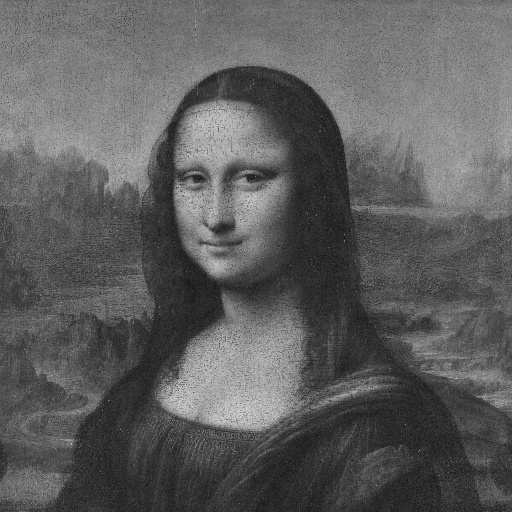

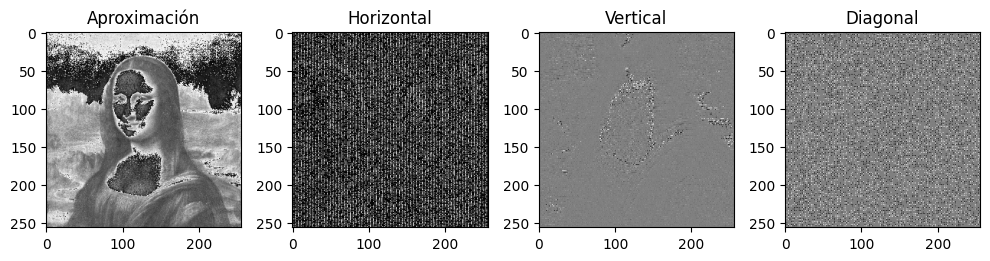

In [81]:
imgOr = cv2.imread(('image_color.jpg'), cv2.IMREAD_GRAYSCALE)
# imgOr = cv2.resize(imgOr,(64,64))
imgOr = np.array(imgOr)

# DIRECT WEVELET TRANSFORM --> dwt
result = direct_wavelet2D_V(direct_wavelet2D_H(imgOr))

cA, cH, cV, cD = dividir_matriz(result)

# reconstructed_matriz = np.empty((2 * approximation2d(dwt).shape[0], imgOr.shape[1]))
# reconstructed_matriz = inverse_wavelet2D(dwt, reconstructed_matriz)

imshow(imgOr)

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')
plt.tight_layout()
plt.show()